## Setup Python Environment 

The next cell sets up the dependencies in required for the notebook, run it.

In [ ]:
# Setup environment
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
!pip install tensorflow==2.0.0-rc1

Selecting previously unselected package xxd.
(Reading database ... 144579 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.3_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.3) ...
Setting up xxd (2:8.0.1453-1ubuntu1.3) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 86.3MB 52kB/s 
     |████████████████████████████████| 501kB 33.6MB/s 
     |████████████████████████████████| 4.3MB 23.7MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


# Upload Data

1. Open the panel on the left side of Colab by clicking on the __>__
1. Select the files tab
1. Drag `punch.csv` and `flex.csv` files from your computer to the tab to upload them into colab.

# Graph Data (optional)

We'll graph the input files on two separate graphs, acceleration and gyroscope, as each data set has different units and scale.

---
## Range Function

* Starts at 1
* len(df[]) = Get the number of rows: len(df), function from pandas library
* In this case with the flex.csv, there's 395 values, so the range function will iterate through that many


Lenght of ax :  1190

Index range(1, 1191)


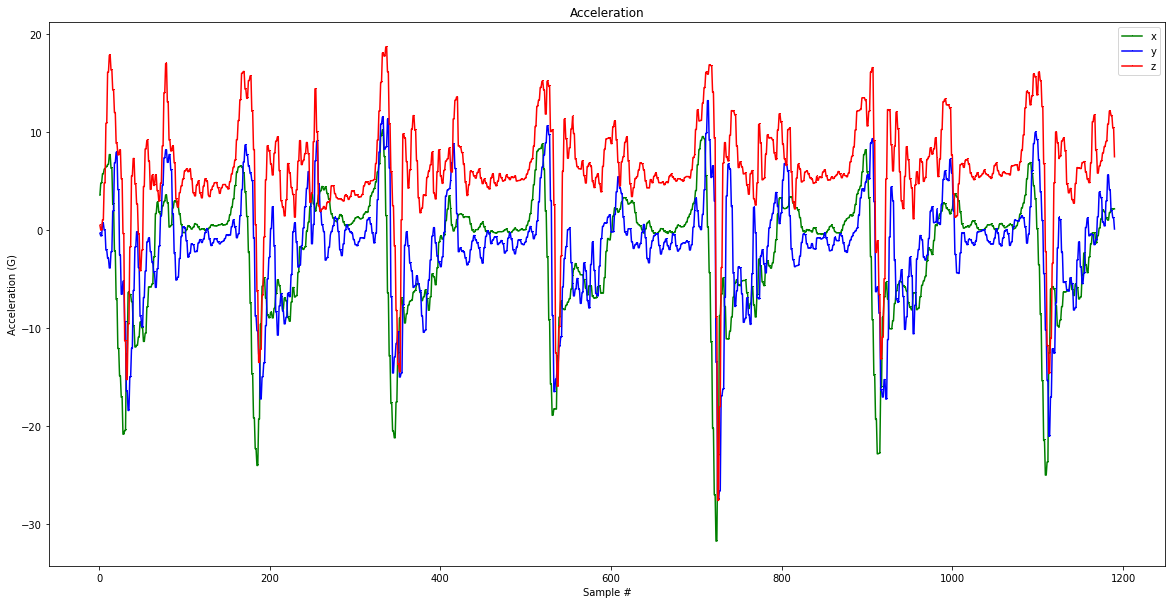

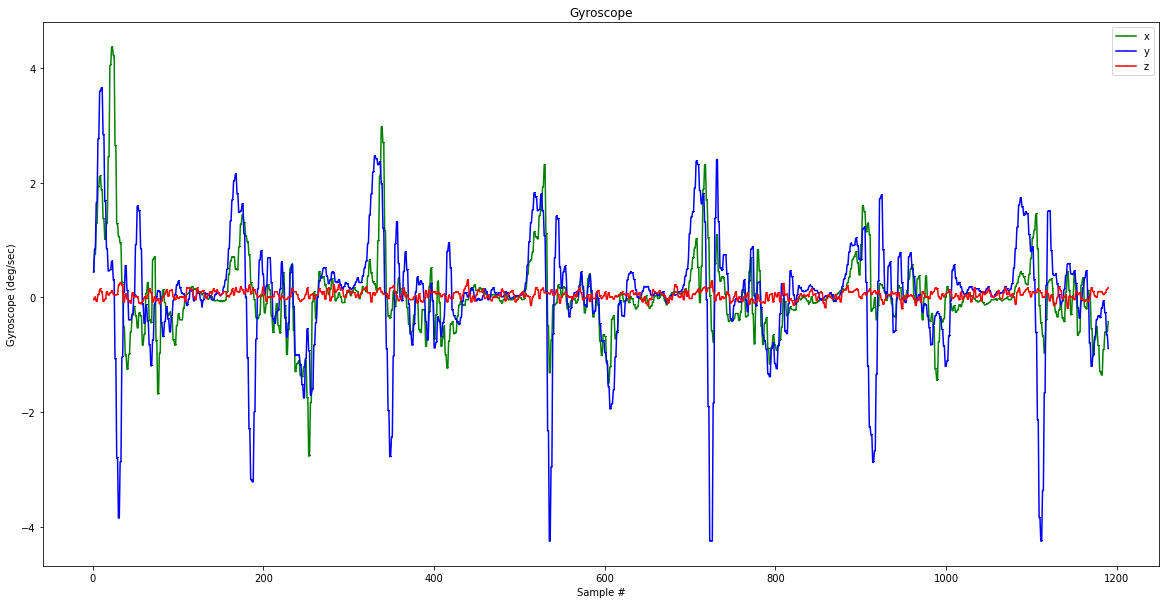

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = "punch.csv"

df = pd.read_csv("/content/" + filename)

index = range(1, len(df['aX']) + 1)

print("Lenght of ax : ", len(df['aX']))
print("\nIndex", index)


plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()


# Train Neural Network





## Parse and prepare the data

The next cell parses the csv files and transforms them to a format that will be used to train the fully connected neural network.

Update the `GESTURES` list with the gesture data you've collected in `.csv` format.

---

## SEED function

* Sets number of values to be generated
* np.random.seed() generates predictable random numbers

---

## numpy.eye()

* numpy.eye() = Returns matrix that has 1's goign diagonally and 0's everywhere else

* Parameters
  numpy.eye(R,C = NONE, k = 0,dtype = type<float>, order = 'C')
  * R = number of rows
  * C = (Optional) number of columns | Default is M = N --> 
        M (number of columns) = N (Number of Rows)
  * k : (int, optional, 0 by default) This is the diagonal 
      * k > 0 --> POSITIVE NUMBER --> upper diagonal
      * k < 0 --> NEGATIVE NUMBER --> lower diagonal
  * dtype : (optional, float by default | Data type of returned array)
  * order : This parameter can be either C_contiguous or F_contiguous

---

## One Hot Encoding

Reference Link : [here](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)

Additional referece link : [here](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)

One-hot Encoding YT [video](https://www.youtube.com/watch?v=v_4KWmkwmsU)


ML algorithms can't work with categorical data directly and needs to be 
  converted into numbers
  
One hot encoding = Represent catagorical variables as binary vectors

Steps to use 'One hot encoding'

1. Map categorical values as integer values

2. Each integer value representing a binary vector is all 0's except the index of the integer that's marked with a 1
  * If there's a cat dog and lizard it'll look like --> [1,0,0] = cat | [0,1,0] = dog --> [0,0,1] = lizard
  * This is used instead of string names
    * If cat is interpreted, the vector, NOT the name is used to label it




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

#print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
# Lists = arrays that doesn't have to have the same data, can have int,string,ect
# Unlike Strings in python, the data in lists can be changed
GESTURES = [
    "punch",
    "flex",
    #"fall",
]

SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)
print("Lenght of GESTURES == NUM_GESTURES : ",NUM_GESTURES)

ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

print("\n\n ONE_HOT FOR : ", GESTURES[0] , " : ", ONE_HOT_ENCODED_GESTURES[0])
print("\n\n ONE_HOT FOR : ", GESTURES[1] , " : ", ONE_HOT_ENCODED_GESTURES[1])

# Initialize inputs/output array(s)
inputs = []
outputs = []

# read each csv file and push an input and output
# NUM_GESTURES = 2 since there's only the flex/punch CSV files
# gesture_index is just the name for the 'FOR Loop' that's being used

# ================ START of For loop ================ #
for gesture_index in range(NUM_GESTURES):

  # GESTURES = CSV files for punch and flex
  # For loop iterates through entire CSV file and stores it in gesture
  gesture = GESTURES[gesture_index]

  print(f"\nProcessing index {gesture_index} for gesture '{gesture}'. \n\n")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]

  print("ONE_HOT_ENCODED_GESTURES : ",output)
  
  # Saves contents of CSV file into df
  df = pd.read_csv("/content/" + gesture + ".csv")
  print("\nDF : ",df)

  # calculate the number of gesture recordings in the file
  # df.shape[] = get the number of rows and columns
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

  print('\n------------------------------------------------------------------\n')

  print("DF SHAPE : ", int(df.shape[0]))
  
  print(f"\nThere are {num_recordings} recordings of the {gesture} gesture.")

  print('\n------------------------------------------------------------------\n')

  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
          ]
    # Takes tensor values and adds them to inputs array
    inputs.append(tensor)
    outputs.append(output)

  # ================ END of For loop ================ #

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

# inputs = normalized tensor data
print("\n---- INPUTS ----\n\n", inputs)

# outputs = one hot encoded data
print("\n---- OUTPUTS ----\n\n", outputs)

print("\nData set parsing and preparation complete.")

Lenght of GESTURES == NUM_GESTURES :  2


 ONE_HOT FOR :  punch  :  [1. 0.]


 ONE_HOT FOR :  flex  :  [0. 1.]

Processing index 0 for gesture 'punch'. 


ONE_HOT_ENCODED_GESTURES :  [1. 0.]

DF :          aX    aY     aZ    gX    gY    gZ
0     3.57 -0.32   0.49  0.44  0.44 -0.04
1     4.80 -0.59  -0.00  0.75  0.84 -0.00
2     4.80 -0.59  -0.00  0.75  0.84 -0.00
3     5.74  0.69   1.04  1.29  1.65 -0.07
4     5.74  0.69   1.04  1.29  1.65 -0.07
...    ...   ...    ...   ...   ...   ...
1185  2.19  1.96  11.67 -0.60 -0.27  0.08
1186  2.19  1.96  11.67 -0.60 -0.27  0.08
1187  2.13  1.26  10.41 -0.60 -0.65  0.14
1188  2.13  1.26  10.41 -0.60 -0.65  0.14
1189  2.17  0.11   7.48 -0.42 -0.89  0.17

[1190 rows x 6 columns]

------------------------------------------------------------------

DF SHAPE :  1190

There are 10 recordings of the punch gesture.

------------------------------------------------------------------


Processing index 1 for gesture 'flex'. 


ONE_HOT_ENCODED_GESTURES :  

## Randomize and split the input and output pairs for training

Randomly split input and output pairs into sets of data: 60% for training, 20% for validation, and 20% for testing.

  - the training set is used to train the model
  - the validation set is used to measure how well the model is performing during training
  - the testing set is used to test the model after training

In [ ]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)

# Shuffles array along first axis of a multi-dimensional array
np.random.shuffle(randomize)

# num_inputs = aX,aY,aZ,gX,gY,gZ
print("Lenght of inputs : " , num_inputs)
print("\nRandomize : ", randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

print("\nRandomized Inputs : ", inputs)
print("\nRandomized Outputs : ", outputs)

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("\nData set randomization and splitting complete.")

Lenght of inputs :  20

Randomize :  [ 5  3  4  0 15 11  2 12 13  1 16 17 10 14  6  9 19 18  7  8]

Randomized Inputs :  [[ 0.3925     0.66625    1.67      ...  0.500135   0.5004075  0.50003  ]
 [-0.68375    0.30625    1.67125   ...  0.4999975  0.50002    0.50001  ]
 [ 0.51375    0.23625    1.1975    ...  0.49981    0.4998825  0.500005 ]
 ...
 [ 0.86875    0.74375    0.48375   ...  0.5002075  0.4996     0.5000225]
 [ 0.49375    0.27       1.165     ...  0.500005   0.4999775  0.49999  ]
 [-0.51625   -0.0875     1.035     ...  0.5        0.5000375  0.5000125]]

Randomized Outputs :  [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]

Data set randomization and splitting complete.


## Build & Train the Model

Build and train a [TensorFlow](https://www.tensorflow.org) model using the high-level [Keras](https://www.tensorflow.org/guide/keras) API.

## tf.keras.layers.Dense() function notes

Dense() function parameters
* layers.Dense(units, activation = NONE)
* Units = positive integer, dimensionality of output space


---

## Notes about Activation Functions

#### Reference Link : [here](https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/)

Activation functions determines the :
  1. Output of a deep learning model
  2. The accuracy
  3. Computational efficiency of training a model
  4. Have a big effect on the N.N ability to converge and affects the 
  convergence speed
  5. Can prevent N.N from converging in the first place

Activation funcions = math equations that determine the output of a N.N

  * The function is attached to each neuron in the network and determines if    a the neuron should 'fire' or not based if the neuron's input is relevant to for the model's prediction.

  * They also help normalize the output of each neuron to a range between either
  1 and 0, or -1 and 1


---

## Relu = Rectified Linear Unit

### Reference Link : [Information about ReLU](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)

### Great Youtube Video on [Activation Factors](https://www.youtube.com/watch?v=m0pIlLfpXWE)

* Activation function responsible for changing the summed weighted
   input from the node inot the activation of the node/output for that input

* ReLU only takes the positive values of the input data, if data <= 0 --> it'll
just return a 0

* Relu = piecewise linear function that will output the input directly if a   positive. If not, the output will be zero

* Relu is the default activation function for numerous NN since it's easy a     to train and performs better
  
---

## Softmax

* Used to impart probabilities <--- Look more into that 
* Used when there's 4 or five outputs
* Using this A.F will get you the probability distribution of each one
* Useful when finding the most porbable occurance/classifiction where the probability of a class is maximum

In [ ]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) 
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/600
12/12 [==============================] - 0s 11ms/step - loss: 0.4355 - mae: 0.5963 - val_loss: 0.1360 - val_mae: 0.3369
Epoch 2/600
12/12 [==============================] - 0s 3ms/step - loss: 0.1526 - mae: 0.3489 - val_loss: 0.0616 - val_mae: 0.2393
Epoch 3/600
12/12 [==============================] - 0s 3ms/step - loss: 0.1157 - mae: 0.3138 - val_loss: 0.0432 - val_mae: 0.1874
Epoch 4/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0631 - mae: 0.2216 - val_loss: 0.1304 - val_mae: 0.2623
Epoch 5/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0498 - mae: 0.1788 - val_loss: 0.0316 - val_mae: 0.1368
Epoch 6/600
12/12 [==============================] - 0s 4ms/step - loss: 0.0251 - mae: 0.1161 - val_loss: 0.0870 - val_mae: 0.1984
Epoch 7/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0254 - mae: 0.1055 - val_loss: 0.0202 - val_mae: 0.0975
Epoch 8/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0192 - 

## Verify 

Graph the models performance vs validation.


### Graph the loss

Graph the loss to see when the model stops improving.

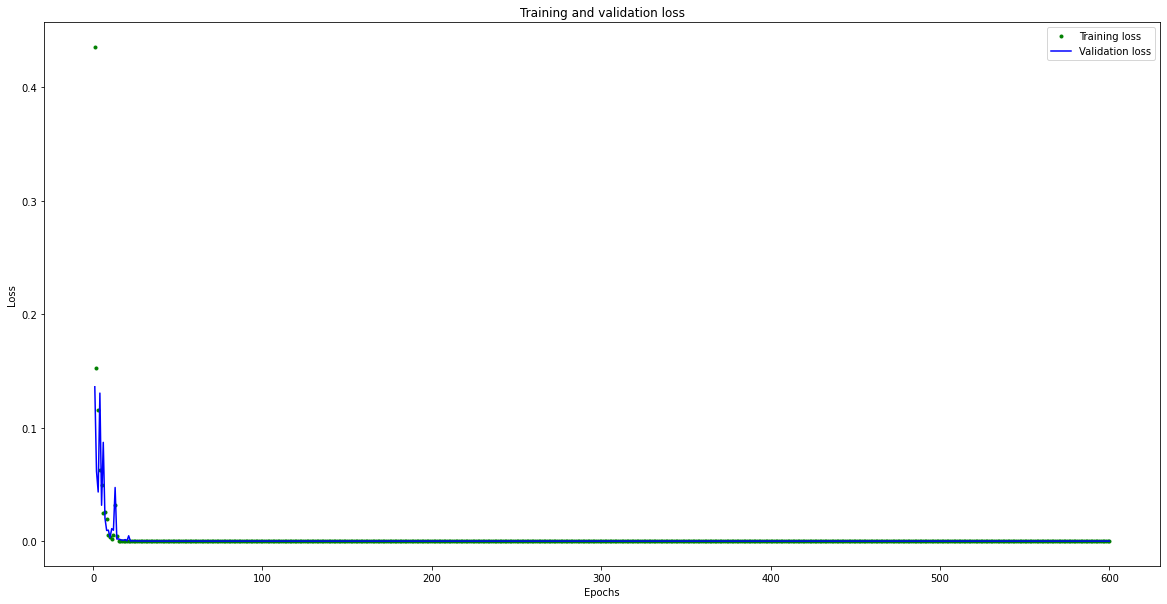

[20.0, 10.0]


In [ ]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

### Graph the loss again, skipping a bit of the start

We'll graph the same data as the previous code cell, but start at index 100 so we can further zoom in once the model starts to converge.

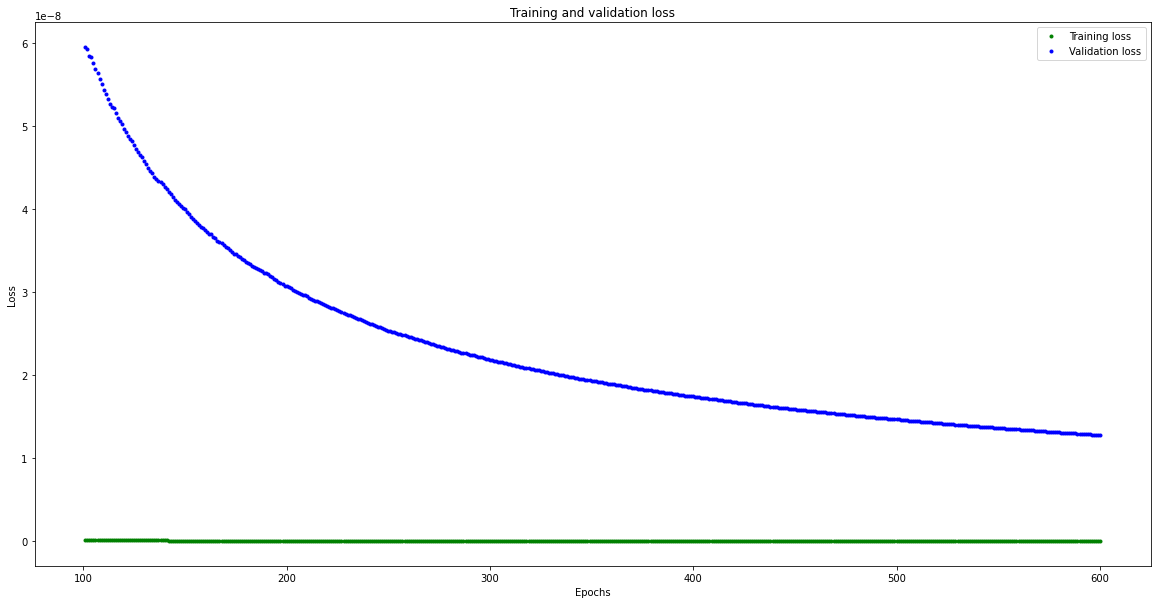

In [ ]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Graph the mean absolute error

[Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) is another metric to judge the performance of the model.



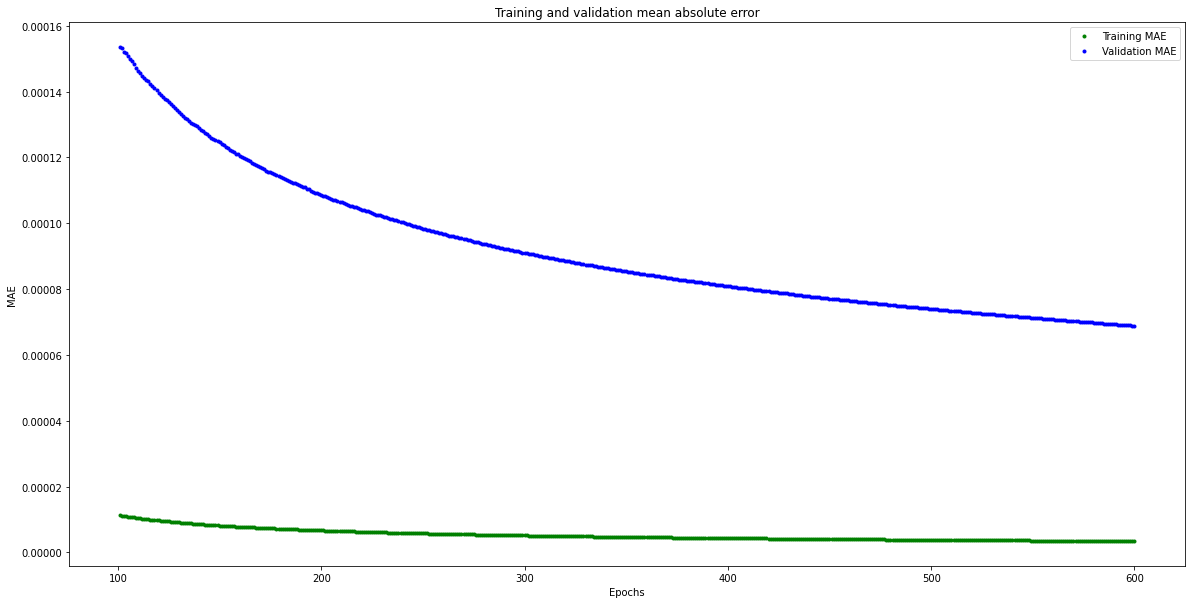

In [ ]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


### Run with Test Data
Put our test data into the model and plot the predictions


predictions =
 [[0.198 0.802]
 [0.    1.   ]
 [0.999 0.001]
 [1.    0.   ]]
actual =
 [[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  if sys.path[0] == '':


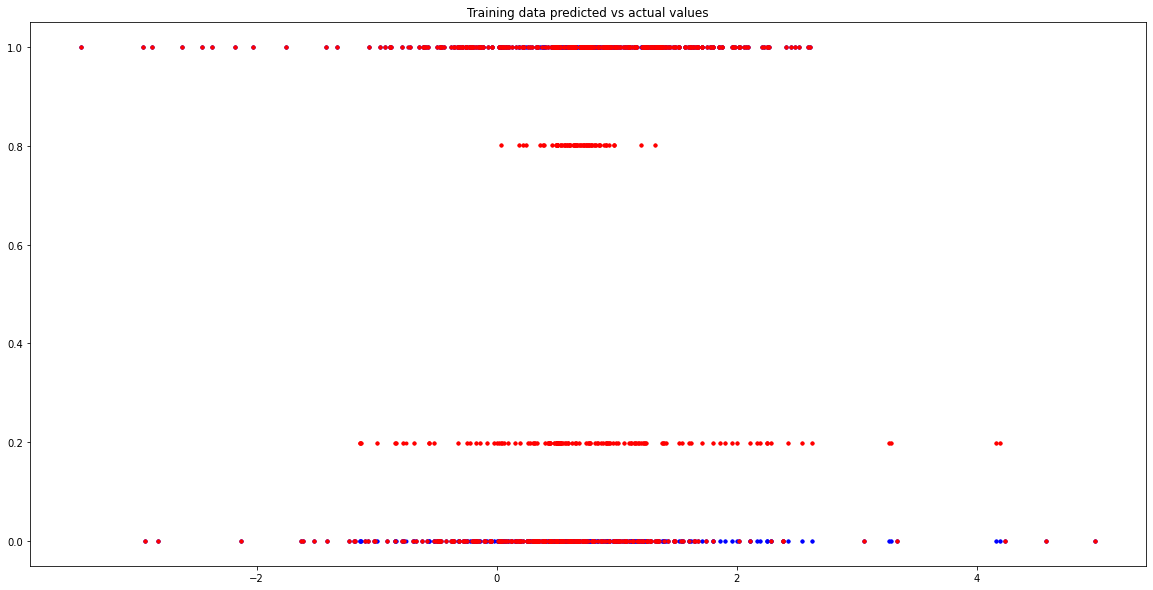

In [ ]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()

# Convert the Trained Model to Tensor Flow Lite

The next cell converts the model to TFlite format. The size in bytes of the model is also printed out.

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)
  
  

INFO:tensorflow:Assets written to: /tmp/tmp03phcyj2/assets


INFO:tensorflow:Assets written to: /tmp/tmp03phcyj2/assets


Model is 147804 bytes


## Encode the Model in an Arduino Header File 

The next cell creates a constant byte array that contains the TFlite model. Import it as a tab with the sketch below.

In [ ]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 911,492 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


# Classifying IMU Data

Now it's time to switch back to the tutorial instructions and run our new model on the Arduino Nano 33 BLE Sense to classify the accelerometer and gyroscope data.
